WENTAO LIU 206085049

# 1.) Preprocess your data into scaled input variables and an output variable


In [2]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON441B_W/week6/CLV.csv")


In [5]:
df

,Unnamed: 0,Customer Lifetime Value,Income,Number of Policies,Total Claim Amount,Months Since Last Claim,Vehicle Size_Large,Vehicle Size_Medsize,Gender_M,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Policy Type_Corporate Auto,Policy Type_Personal Auto,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,0,2763.519279,56274,1,384.811147,32,0,1,0,1,0,0,0,1,0,0,1,0
1,1,6979.535903,0,8,1131.464935,13,0,1,0,0,0,0,1,0,1,0,0,1
2,2,12887.431650,48767,2,566.472247,18,0,1,0,1,0,0,0,0,1,0,1,0
3,3,7645.861827,0,7,529.881344,18,0,1,1,0,0,0,1,1,0,0,1,0
4,4,2813.692575,43836,1,138.130879,12,0,1,1,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,23405.987980,71941,2,198.234764,18,0,1,1,1,0,0,0,0,1,0,1,0
9130,9130,3096.511217,21604,1,379.200000,14,0,1,0,1,0,0,0,1,0,1,0,0
9131,9131,8163.890428,0,2,790.784983,9,0,1,1,0,0,0,1,1,0,0,0,1
9132,9132,7524.442436,21941,3,691.200000,34,1,0,1,1,0,0,0,0,1,0,1,0


In [6]:
X = df.drop(["Unnamed: 0","Customer Lifetime Value"], axis =1 )
y = df['Customer Lifetime Value']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2.) Run a GridSearch CV on at least 10 possible combinations of hyper parameters 

In [10]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

In [11]:
MLPRegressor?

In [12]:
clf = MLPRegressor()

params = {
    "hidden_layer_sizes": [(10,), (20,5,), (10,50,), (10,100,10,)], 
    "activation" : ['relu', 'tanh', 'logistic'],
    "alpha":[0.0001, 0.001]
}

In [15]:
grid = GridSearchCV(clf, params, cv = 5)
grid.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

GridSearchCV(cv=5, estimator=MLPRegressor(),
             param_grid={'activation': ['relu', 'tanh', 'logistic'],
                         'alpha': [0.0001, 0.001],
                         'hidden_layer_sizes': [(10,), (20, 5), (10, 50),
                                                (10, 100, 10)]})

In [16]:
print(grid.best_params_)

{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (10, 100, 10)}


# 3.) Train a model with the optimal solution from GridSearch

In [17]:
MLPRegressor(**grid.best_params_)

MLPRegressor(alpha=0.001, hidden_layer_sizes=(10, 100, 10))

In [18]:
# p_dict = {
#     "hidden_layer_sizes": (10, 100, 10), 
#     "activation" : 'relu',
#     'alpha': 0.0001
# }

# MLPRegressor(**p_dict)

#=======EQUIVALENT TO========

model = MLPRegressor(**grid.best_params_)
model

MLPRegressor(alpha=0.001, hidden_layer_sizes=(10, 100, 10))

# 4.) What are the in-sample and out of sample MSEs

In [19]:
from sklearn.metrics import mean_squared_error

model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("In-sample MSE: ", mse_train)
print("Out-of-sample MSE: ", mse_test)

In-sample MSE:  41635026.626182914
Out-of-sample MSE:  46435818.50094119


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# 5.) Build a Keras with the architecture defined by GridSearchCV

In [20]:
import keras.models
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense

In [21]:
model = Sequential()
model.add(Dense(12, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='softmax'))

In [22]:
model.compile(loss = 'mse', optimizer = Adam(lr = 0.01))
model.fit(X_train, y_train, batch_size=32, epochs=100)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/100
200/200 [==============================] - 1s 2ms/step - loss: 108702216.0000
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 108702184.0000
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 108702216.0000
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 108702176.0000
Epoch 5/100
200/200 [==============================] - 0s 1ms/step - loss: 108702224.0000
Epoch 6/100
200/200 [==============================] - 0s 1ms/step - loss: 108702280.0000
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 108702216.0000
Epoch 8/100
200/200 [==============================] - 0s 1ms/step - loss: 108702216.0000
Epoch 9/100
200/200 [==============================] - 0s 2ms/step - loss: 108702208.0000
Epoch 10/100
200/200 [==============================] - 0s 2ms/step - loss: 108702264.0000
Epoch 11/100
200/200 [==============================] - 0s 1ms/step - loss: 108702184.0000
Epoch 12

# 6.) Make two visualizations of your NN using “plot_model” and “ann_viz”

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                204       
                                                                 
 dense_1 (Dense)             (None, 12)                156       
                                                                 
 dense_2 (Dense)             (None, 1)                 13        
                                                                 
Total params: 373
Trainable params: 373
Non-trainable params: 0
_________________________________________________________________


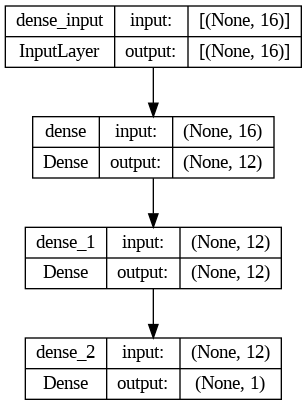

In [27]:
# plot
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes = True)

In [ ]:
from ann_visualizer.visualize import ann_viz

ann_viz(model, title = "Neural Network Architecture")

Ann_viz package does not work.